In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from sklearn import datasets
from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA
from sklearn import preprocessing
# set seaborn's default settings
sns.set()

### `Import Data`  
We import the data into multiple dataframes by their subset for later use, but also can concatenate them for current use.

In [209]:
excel_file = 'weld_defect_dataset.xlsx'
subsets = []

for i in range(1, 6):
    subset = pd.read_excel(excel_file, sheet_name = 'subset' + str(i))
    subset = subset.rename(columns={'Type':'type',
                                    'W':'w',
                                    'Ar':'ar',
                                    'Sp':'sp',
                                    'Re':'re',
                                    'Rr':'rr',
                                    'Sk':'sk',
                                    'Ku':'ku',
                                    'Hc':'hc',
                                    'Rc':'rc',
                                    'Sc ':'sc',
                                    'Kc ':'kc'}) #note the space after Sc and Kc are errors in naming in the excel file and are corrected here for ease of use later
    subsets.append(subset)

subsetsall = pd.concat(subsets, ignore_index=True)
subsetsall

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
0,PO,0.008596,0.006897,0.5748,0.838397,0.998562,0.091802,0.908459,0.003151,0.111302,0.256742,0.389952
1,PO,0.010029,0.003448,0.4112,0.838397,0.649317,0.039172,0.476520,0.002817,0.121299,0.332611,0.443785
2,PO,0.007163,0.003448,0.4400,1.007173,0.754309,0.048079,0.766430,0.002621,0.127759,0.323068,0.444515
3,PO,0.028653,0.003448,0.3124,0.534599,0.061617,0.244800,0.789110,0.010007,0.092632,0.220312,0.339685
4,PO,0.018625,0.003448,0.4024,0.557089,0.037346,0.578774,0.630554,0.006757,0.073914,0.270908,0.273045
...,...,...,...,...,...,...,...,...,...,...,...,...
215,CR,0.277937,0.949262,1.0268,0.102869,0.723013,0.025025,0.468658,0.101296,0.757683,0.231426,0.516244
216,CR,0.148997,0.720690,0.8172,0.055527,0.509504,0.135456,0.551284,0.010890,0.262126,0.410800,0.530843
217,CR,0.320917,0.846359,0.7100,0.106793,0.407912,0.027538,0.488077,0.191586,0.757547,0.158517,0.559012
218,CR,0.322350,0.578386,0.6420,0.143629,0.384393,0.039732,0.492730,0.154902,0.640716,0.218541,0.567931


`For Reference:`  

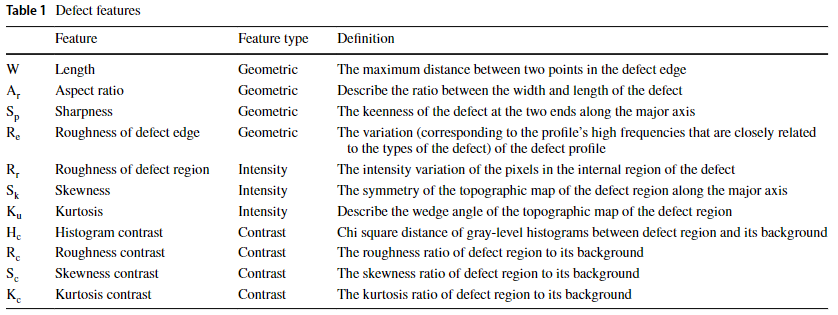

We now have indivudal dataframes for each subset of data, but we also have one large dataframe for current use / data exploration where applicable:

In [210]:
print(subsets[0].shape)
print(subsets[4].shape)
print(subsetsall.shape)

(44, 12)
(44, 12)
(220, 12)


With `.info()` we see that the data is in a very clean format, with no missing values `(220 non-null)`, and all data types are correct.

In [211]:
subsetsall.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    220 non-null    object 
 1   w       220 non-null    float64
 2   ar      220 non-null    float64
 3   sp      220 non-null    float64
 4   re      220 non-null    float64
 5   rr      220 non-null    float64
 6   sk      220 non-null    float64
 7   ku      220 non-null    float64
 8   hc      220 non-null    float64
 9   rc      220 non-null    float64
 10  sc      220 non-null    float64
 11  kc      220 non-null    float64
dtypes: float64(11), object(1)
memory usage: 20.8+ KB


or we can do so with `.dtypes` and `.isnull().sum().sum()` :

In [212]:
subsetsall.dtypes

type     object
w       float64
ar      float64
sp      float64
re      float64
rr      float64
sk      float64
ku      float64
hc      float64
rc      float64
sc      float64
kc      float64
dtype: object

In [213]:
subsetsall.isna().sum().sum()

0

We can also use `.describe()` to get a quick overview of the data:

In [214]:
subsets[0].describe()

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.193312,0.219518,0.596164,0.408728,0.244100,0.190435,0.618382,0.114831,0.227141,0.222136,0.468713
std,0.220107,0.260694,0.217955,0.274365,0.223650,0.171583,0.145415,0.157291,0.209002,0.113051,0.138047
min,0.007163,0.003448,0.192400,0.004051,0.001971,0.011205,0.269329,0.001358,0.032748,0.002616,0.100178
25%,0.041189,0.014874,0.415600,0.145802,0.087699,0.080167,0.536612,0.017436,0.110421,0.142772,0.412662
50%,0.088109,0.062179,0.551800,0.492258,0.169426,0.115660,0.585224,0.038245,0.155732,0.215720,0.468566
75%,0.280444,0.393534,0.830500,0.599842,0.330571,0.243957,0.672636,0.131052,0.218242,0.292278,0.545424
max,1.000000,0.826724,0.928000,1.007173,0.998562,0.681613,1.113649,0.617477,1.001281,0.571364,0.911416


In [215]:
subsets[4].describe()

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.175860,0.220914,0.623318,0.391490,0.243808,0.190940,0.582134,0.080576,0.219547,0.225331,0.502365
std,0.188479,0.276367,0.209529,0.277337,0.203288,0.221725,0.163183,0.095121,0.180705,0.152141,0.164504
min,0.007163,0.003448,0.157200,0.002152,0.000200,0.001608,0.168895,0.002135,0.013219,0.001474,0.155346
25%,0.038682,0.009670,0.438300,0.135696,0.093246,0.074033,0.495114,0.015487,0.099992,0.131640,0.416361
50%,0.090974,0.059112,0.638000,0.437933,0.199206,0.132192,0.563511,0.035016,0.178824,0.213700,0.498491
75%,0.263968,0.362931,0.783000,0.606814,0.334925,0.158128,0.643986,0.125883,0.265546,0.309116,0.582118
max,0.816619,0.949262,1.026800,1.007173,0.817756,1.002376,1.128828,0.378949,0.757683,0.729507,0.990413


In [216]:
subsetsall.describe()

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.175905,0.207577,0.599259,0.392519,0.249057,0.167519,0.604765,0.092316,0.216053,0.240740,0.478316
std,0.192450,0.256669,0.216377,0.265337,0.208797,0.164088,0.150983,0.138605,0.173100,0.143031,0.150625
min,0.001433,0.003448,0.025200,0.000591,0.000118,0.001608,0.168895,0.000013,0.004129,0.001474,0.028573
25%,0.035817,0.011860,0.415600,0.131772,0.086298,0.065242,0.519888,0.012539,0.107777,0.145720,0.372002
50%,0.078080,0.062179,0.586600,0.412764,0.213024,0.113033,0.571244,0.033709,0.158049,0.216357,0.481886
75%,0.277937,0.362931,0.826200,0.604219,0.339437,0.198047,0.670390,0.111988,0.254074,0.317875,0.572017
max,1.000000,1.037931,1.026800,1.007173,1.003975,1.002376,1.202949,1.049198,1.001281,1.000876,1.025173


From the 3 `.describe()` commands, it can be seen that all subsets seem to have similar data, so for further data exploration we will use the full concatenated dataset.

In [217]:
# original subset is 44 rows
# original sebsetsall is 220 rows (44*5)

for i in range(5):
    subsets[i].drop_duplicates(inplace=True)
    print(subsets[i].shape)

print(subsetsall.shape)
subsetsall_temp = subsetsall.copy()
subsetsall_temp.drop_duplicates(inplace=True)
print(subsetsall_temp.shape)

(44, 12)
(44, 12)
(44, 12)
(44, 12)
(44, 12)
(220, 12)
(219, 12)


We can see that no individual subset has any duplicated entires, but the concatenated dataframe does. With the precision of 4-6 decimal numbers over 11 columns in the dataframe, it is unlikely to be a true measured duplicate and more likely to be an duplicate entry. We will leave the dublicate removed from the concatenated dataframe and remove it from one of the subsets.

In [218]:
duplicated_row = subsetsall[subsetsall.duplicated()]
duplicated_row

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
50,PO,0.015759,0.003448,0.4552,0.627426,0.056636,0.116363,0.678178,0.004218,0.107777,0.266969,0.444385


In [219]:
# Assuming you have already read the DataFrames into 'subsets' list
duplicated_row = subsetsall[subsetsall.duplicated()].iloc[0]

def is_same_row(row, target_row):
    return row.equals(target_row)

for i in range(5):
    # Check if each row in the DataFrame is the same as the example_row
    same_rows = subsets[i].apply(is_same_row, axis=1, args=(duplicated_row,))
    if same_rows.any():
        print("Subset " + str(i+1) + ":")
        print("Rows that are the same as the example row:")
        print(subsets[i][same_rows])

Subset 1:
Rows that are the same as the example row:
  type         w        ar      sp        re        rr        sk        ku  \
6   PO  0.015759  0.003448  0.4552  0.627426  0.056636  0.116363  0.678178   

         hc        rc        sc        kc  
6  0.004218  0.107777  0.266969  0.444385  
Subset 2:
Rows that are the same as the example row:
  type         w        ar      sp        re        rr        sk        ku  \
6   PO  0.015759  0.003448  0.4552  0.627426  0.056636  0.116363  0.678178   

         hc        rc        sc        kc  
6  0.004218  0.107777  0.266969  0.444385  


It can be seen from the above that subset1 and subset2 have their index 6 row as the same. For reasons mentioned earlier we will remove this row from one of the subsets, in this case subset2 as it came later in the data than subset1.

In [220]:
subsets[1].head(10)

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
0,PO,0.008596,0.003448,0.6420,0.416456,1.003975,0.116834,0.961553,0.003549,0.125551,0.345271,0.407876
1,PO,0.012894,0.003448,0.3784,0.235612,0.599335,0.100720,0.661515,0.003367,0.100663,0.161510,0.362336
2,PO,0.012894,0.003448,0.3784,0.235612,0.472149,0.015586,0.373776,0.003766,0.070719,0.240516,0.371707
3,PO,0.010029,0.003448,0.2152,0.979030,0.421204,0.043400,0.783220,0.003151,0.004129,0.017908,0.028573
4,PO,0.020057,0.003448,0.5600,0.527511,0.050374,0.211741,0.725096,0.008584,0.084605,0.281740,0.329137
5,PO,0.011461,0.003448,0.2996,0.773502,0.310067,0.058798,0.536005,0.001847,0.116556,0.199172,0.441565
6,PO,0.015759,0.003448,0.4552,0.627426,0.056636,0.116363,0.678178,0.004218,0.107777,0.266969,0.444385
7,PO,0.035817,0.003448,0.4156,0.669620,0.007348,0.266460,0.738220,0.016878,0.039208,0.125001,0.242095
8,PO,0.011461,0.003448,0.3000,0.773502,0.121862,0.145167,0.534106,0.001259,0.123437,0.205165,0.502887
9,PO,0.053009,0.003448,0.4104,0.476751,0.081149,0.345283,1.202949,0.034153,0.087581,0.567489,0.475278


In [221]:
subsets[1].drop(6, inplace=True)
print(subsets[1].shape)

(43, 12)


In [222]:
subsets[1].head(10)

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
0,PO,0.008596,0.003448,0.6420,0.416456,1.003975,0.116834,0.961553,0.003549,0.125551,0.345271,0.407876
1,PO,0.012894,0.003448,0.3784,0.235612,0.599335,0.100720,0.661515,0.003367,0.100663,0.161510,0.362336
2,PO,0.012894,0.003448,0.3784,0.235612,0.472149,0.015586,0.373776,0.003766,0.070719,0.240516,0.371707
3,PO,0.010029,0.003448,0.2152,0.979030,0.421204,0.043400,0.783220,0.003151,0.004129,0.017908,0.028573
4,PO,0.020057,0.003448,0.5600,0.527511,0.050374,0.211741,0.725096,0.008584,0.084605,0.281740,0.329137
5,PO,0.011461,0.003448,0.2996,0.773502,0.310067,0.058798,0.536005,0.001847,0.116556,0.199172,0.441565
7,PO,0.035817,0.003448,0.4156,0.669620,0.007348,0.266460,0.738220,0.016878,0.039208,0.125001,0.242095
8,PO,0.011461,0.003448,0.3000,0.773502,0.121862,0.145167,0.534106,0.001259,0.123437,0.205165,0.502887
9,PO,0.053009,0.003448,0.4104,0.476751,0.081149,0.345283,1.202949,0.034153,0.087581,0.567489,0.475278
10,SL,0.018625,0.020690,0.6496,0.744641,0.304496,0.052827,0.370475,0.007743,0.187048,0.500302,0.330965


Reset index in the two dataframes with removed rows:

In [223]:
subsetsall.reset_index(drop=True, inplace=True) # use the drop=True to avoid the old index being added as a column, and having to drop it later
subsets[1].reset_index(drop=True, inplace=True)
subsets[1].head(10)

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
0,PO,0.008596,0.003448,0.6420,0.416456,1.003975,0.116834,0.961553,0.003549,0.125551,0.345271,0.407876
1,PO,0.012894,0.003448,0.3784,0.235612,0.599335,0.100720,0.661515,0.003367,0.100663,0.161510,0.362336
2,PO,0.012894,0.003448,0.3784,0.235612,0.472149,0.015586,0.373776,0.003766,0.070719,0.240516,0.371707
3,PO,0.010029,0.003448,0.2152,0.979030,0.421204,0.043400,0.783220,0.003151,0.004129,0.017908,0.028573
4,PO,0.020057,0.003448,0.5600,0.527511,0.050374,0.211741,0.725096,0.008584,0.084605,0.281740,0.329137
5,PO,0.011461,0.003448,0.2996,0.773502,0.310067,0.058798,0.536005,0.001847,0.116556,0.199172,0.441565
6,PO,0.035817,0.003448,0.4156,0.669620,0.007348,0.266460,0.738220,0.016878,0.039208,0.125001,0.242095
7,PO,0.011461,0.003448,0.3000,0.773502,0.121862,0.145167,0.534106,0.001259,0.123437,0.205165,0.502887
8,PO,0.053009,0.003448,0.4104,0.476751,0.081149,0.345283,1.202949,0.034153,0.087581,0.567489,0.475278
9,SL,0.018625,0.020690,0.6496,0.744641,0.304496,0.052827,0.370475,0.007743,0.187048,0.500302,0.330965


Use `.describe()` and `.info()` on our cleaned data (concatenated only is okay here):

In [224]:
subsetsall.describe()

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.175905,0.207577,0.599259,0.392519,0.249057,0.167519,0.604765,0.092316,0.216053,0.240740,0.478316
std,0.192450,0.256669,0.216377,0.265337,0.208797,0.164088,0.150983,0.138605,0.173100,0.143031,0.150625
min,0.001433,0.003448,0.025200,0.000591,0.000118,0.001608,0.168895,0.000013,0.004129,0.001474,0.028573
25%,0.035817,0.011860,0.415600,0.131772,0.086298,0.065242,0.519888,0.012539,0.107777,0.145720,0.372002
50%,0.078080,0.062179,0.586600,0.412764,0.213024,0.113033,0.571244,0.033709,0.158049,0.216357,0.481886
75%,0.277937,0.362931,0.826200,0.604219,0.339437,0.198047,0.670390,0.111988,0.254074,0.317875,0.572017
max,1.000000,1.037931,1.026800,1.007173,1.003975,1.002376,1.202949,1.049198,1.001281,1.000876,1.025173


In [225]:
subsetsall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    220 non-null    object 
 1   w       220 non-null    float64
 2   ar      220 non-null    float64
 3   sp      220 non-null    float64
 4   re      220 non-null    float64
 5   rr      220 non-null    float64
 6   sk      220 non-null    float64
 7   ku      220 non-null    float64
 8   hc      220 non-null    float64
 9   rc      220 non-null    float64
 10  sc      220 non-null    float64
 11  kc      220 non-null    float64
dtypes: float64(11), object(1)
memory usage: 20.8+ KB


We can also check for any previously labeled numerical data to turn into categorical data:

In [226]:
subsetsall.nunique(axis=0) 

type      5
w       138
ar      164
sp      181
re      175
rr      219
sk      219
ku      219
hc      218
rc      219
sc      219
kc      219
dtype: int64

The only column with a low enough number on unique values to be considered categorical data is the `type` column, which it already is and we will leave it as so.  

We can create a `num` list but a `cat` list is not necessary for this dataset as there is only one categorical column.

In [227]:
nums = list(subsetsall.select_dtypes(exclude=['object']).columns)
nums

['w', 'ar', 'sp', 're', 'rr', 'sk', 'ku', 'hc', 'rc', 'sc', 'kc']

### `Visualize Data`

`PairPlot:`

In [228]:
# sns.pairplot(subsetsall, vars=nums, hue='type')

It can be seen that type PO spikes heavily in some cases such as `hc` vs `hc` and `ar` vs `ac`, but also is ponounced in other cases. We will talk about this later.

Currently, we can identify some features that are useful for finding trends. From initial visual inspeciton, `re` and `rc` plotted against any other feature seem to decently split the data into their categorical types. Specifically, `re` vs `rc` seems the individual best.  

However, others are better at splitting only certain types.  
For example, `kc` vs `w`, `ar`, `rr`, and `hc` split `PO` and `SL` quite well, while `ar` vs `rc` splits `LP` and `CR` well.

A heatmap of the correlation between the numerical data can be made:

<Axes: >

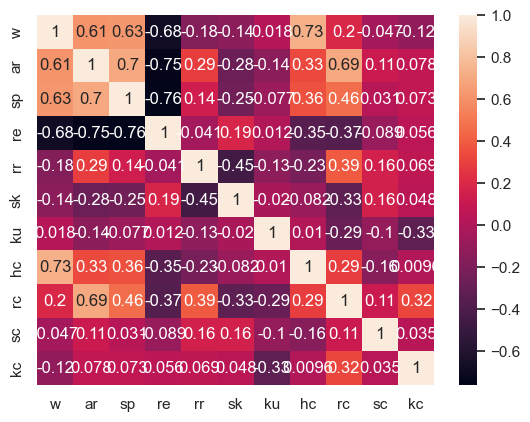

In [229]:
sns.heatmap(subsetsall[nums].corr(), annot=True)

`re` by far has some very good correlations with other features, nameley `w`, `ar`, and `sp`. `rc` also has some good ones.  
Our visual inference was accurate.

Noimalizaiton will likley not help here as it can already be seen that the data is near normal (max near `1` and min near `0`):

In [230]:
subsetsall.describe()

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.175905,0.207577,0.599259,0.392519,0.249057,0.167519,0.604765,0.092316,0.216053,0.240740,0.478316
std,0.192450,0.256669,0.216377,0.265337,0.208797,0.164088,0.150983,0.138605,0.173100,0.143031,0.150625
min,0.001433,0.003448,0.025200,0.000591,0.000118,0.001608,0.168895,0.000013,0.004129,0.001474,0.028573
25%,0.035817,0.011860,0.415600,0.131772,0.086298,0.065242,0.519888,0.012539,0.107777,0.145720,0.372002
50%,0.078080,0.062179,0.586600,0.412764,0.213024,0.113033,0.571244,0.033709,0.158049,0.216357,0.481886
75%,0.277937,0.362931,0.826200,0.604219,0.339437,0.198047,0.670390,0.111988,0.254074,0.317875,0.572017
max,1.000000,1.037931,1.026800,1.007173,1.003975,1.002376,1.202949,1.049198,1.001281,1.000876,1.025173


We can try standardization to see if it helps:

In [231]:
subsetsall_std = subsetsall.copy()
subsetsall_std.head()

,type,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
0,PO,0.008596,0.006897,0.5748,0.838397,0.998562,0.091802,0.908459,0.003151,0.111302,0.256742,0.389952
1,PO,0.010029,0.003448,0.4112,0.838397,0.649317,0.039172,0.476520,0.002817,0.121299,0.332611,0.443785
2,PO,0.007163,0.003448,0.4400,1.007173,0.754309,0.048079,0.766430,0.002621,0.127759,0.323068,0.444515
3,PO,0.028653,0.003448,0.3124,0.534599,0.061617,0.244800,0.789110,0.010007,0.092632,0.220312,0.339685
4,PO,0.018625,0.003448,0.4024,0.557089,0.037346,0.578774,0.630554,0.006757,0.073914,0.270908,0.273045


In [232]:
sc = '_std'
nums_std = []
for s in nums:
    s = s + sc
    nums_std.append(s)
print(nums_std)

['w_std', 'ar_std', 'sp_std', 're_std', 'rr_std', 'sk_std', 'ku_std', 'hc_std', 'rc_std', 'sc_std', 'kc_std']


In [233]:
std_Scaler = preprocessing.StandardScaler()

std_Scaler.fit(subsetsall_std[nums])

subsetsall_std[nums_std] = std_Scaler.transform(subsetsall_std[nums])

subsetsall_std.drop(nums, axis=1, inplace=True)
subsetsall_std.head()

,type,w_std,ar_std,sp_std,re_std,rr_std,sk_std,ku_std,hc_std,rc_std,sc_std,kc_std
0,PO,-0.871346,-0.783647,-0.113297,1.684254,3.597827,-0.462496,2.016023,-0.644772,-0.606526,0.112132,-0.587985
1,PO,-0.863883,-0.797115,-0.871108,1.684254,1.921356,-0.783970,-0.851338,-0.647187,-0.548642,0.643779,-0.229772
2,PO,-0.878809,-0.797115,-0.737704,2.321786,2.425346,-0.729565,1.073185,-0.648604,-0.511237,0.576907,-0.224914
3,PO,-0.766889,-0.797115,-1.328759,0.536691,-0.899764,0.472048,1.223743,-0.595195,-0.714629,-0.143149,-0.922469
4,PO,-0.819115,-0.797115,-0.911871,0.621645,-1.016271,2.512029,0.171193,-0.618696,-0.823010,0.211399,-1.365902


In [234]:
subsetsall_std.describe()

,w_std,ar_std,sp_std,re_std,rr_std,sk_std,ku_std,hc_std,rc_std,sc_std,kc_std
count,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,220.000000,2.200000e+02,2.200000e+02,2.200000e+02
mean,1.695613e-16,-1.049665e-16,6.499851e-16,-6.459479e-17,-8.881784e-17,-3.633457e-17,5.894275e-16,0.000000,7.468773e-17,-5.954833e-17,1.453383e-16
std,1.002281e+00,1.002281e+00,1.002281e+00,1.002281e+00,1.002281e+00,1.002281e+00,1.002281e+00,1.002281,1.002281e+00,1.002281e+00,1.002281e+00
min,-9.086504e-01,-7.971151e-01,-2.659097e+00,-1.480463e+00,-1.194976e+00,-1.013419e+00,-2.893459e+00,-0.667460,-1.227078e+00,-1.676643e+00,-2.992657e+00
25%,-7.295787e-01,-7.642657e-01,-8.507271e-01,-9.849429e-01,-7.812871e-01,-6.247295e-01,-5.634493e-01,-0.576887,-6.269365e-01,-6.658512e-01,-7.074288e-01
50%,-5.094706e-01,-5.677735e-01,-5.863871e-02,7.647339e-02,-1.729715e-01,-3.328123e-01,-2.225271e-01,-0.423804,-3.358522e-01,-1.708633e-01,2.375796e-02
75%,5.313810e-01,6.066479e-01,1.051211e+00,7.996738e-01,4.338488e-01,1.864707e-01,4.356367e-01,0.142255,2.201519e-01,5.405195e-01,6.235052e-01
max,4.291881e+00,3.242489e+00,1.980410e+00,2.321786e+00,3.623811e+00,5.099477e+00,3.970949e+00,6.919429,4.546618e+00,5.326605e+00,3.638873e+00


In [235]:
# sns.pairplot(subsetsall_std, vars=nums_std, hue='type')

The data still looks very similar. We will not use the stnadardized data and instead stick with the original near normal data.

Lets come back to the `PO` type spike from our pairplots. Lets check if it is because of many `PO` types in the data:

<Axes: xlabel='type', ylabel='count'>

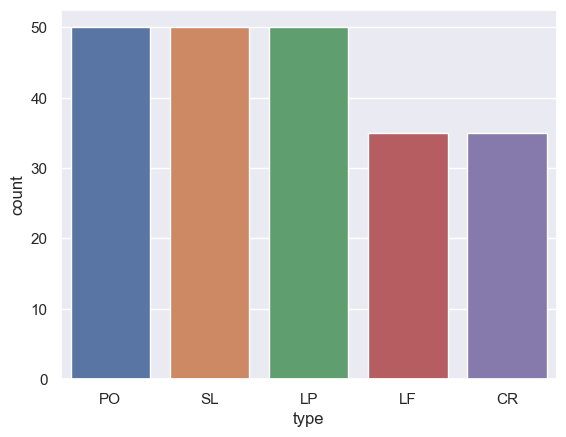

In [236]:
sns.countplot(x='type', data=subsetsall)

There is not an overwhelming amount of `PO` types in the data, so it must be truly strongly correlated as represnted by the pairplot Kernel Density Equation diagonal.

We can investigate it further with a boxplot.

<Axes: xlabel='type', ylabel='hc'>

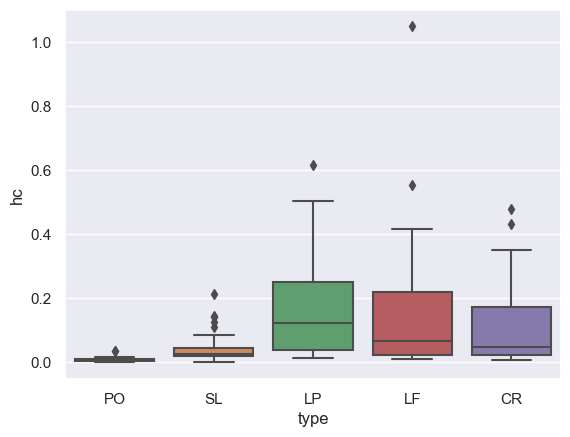

In [237]:
sns.boxplot(x='type', y='hc', data=subsetsall)

Low `hc` very likely means the weld defect is `PO`. This is a strong relation we can use later but must ensure we do not overlook other features.

Lets make a few more plots of the data to see if we can spot anything not yet clear:

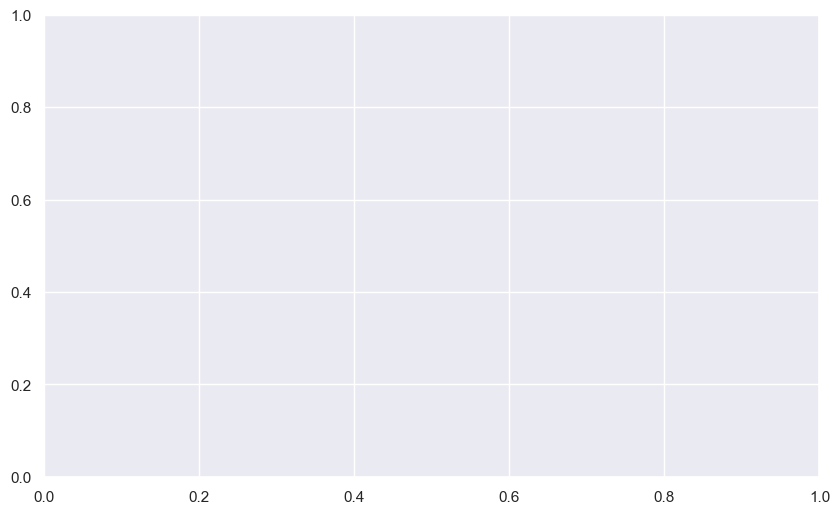

In [238]:
fig, ax1 = plt.subplots(figsize=(10, 6))


# `Classification`

As explored in data preprocessing and visualziation we will use the `re` and `rc` features to classify the data.

Lets review this indivudal scatterplot:

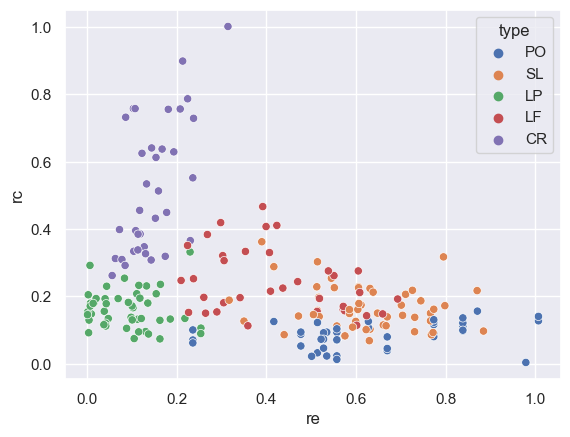

In [239]:
sns.scatterplot(data=subsetsall, x='re', y='rc', hue='type')

plt.show()

Upon inspection of this plot, it is best to use the following 3 types as our targets: `CR`, `LP`, `SL`.  (`CR` and `LP` were noted earlier in data preprocessing and visualization, but we will add `SL` as well due to what we can see more closely in this blowup of the plot.)

More inferences can also be made:

- It will be easy to make a decision boundary between `LP` and `SL` but harder to make a decision with a KNN approach here as the spread over the `re` axis is larger for `SL` than `LP`.  

- For the split between `CR` and `LP`, it seems to be the opposite case. A KNN approach might produce better results due to the closely clumped data points of `CR` near the fuzzy border and decently clumped `LP` data points slightly fartehr from the border.

Also, before we move on to classification, we will do a quick cleanup / restructure of the data to only contain the features and targets we want as stated above. (We will also leave the data in its subsets as to use these as splits for training and testing.) (Also, we encode the type column for later use.)

In [240]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # Create label encoder
encoded_subsets = []

for i in range(5):
    subsets[i] = subsets[i][['type','re', 'rc']] # only keep the columns we want (by features + target column)
    subsets[i] = subsets[i][subsets[i]['type'].isin(['CR','LP','SL'])] # only keep the rows we want (by type)
    subsets[i].reset_index(drop=True, inplace=True) # reset index
    subsets[i]['type_num'] = le.fit_transform(subsets[i]['type']) # encode type column
    print(subsets[i].shape)

(27, 4)
(27, 4)
(27, 4)
(27, 4)
(27, 4)


The total of these types in each subset was equivalet, that's cool.

One of the new subsets:

In [241]:
subsets[4]

,type,re,rc,type_num
0,SL,0.725865,0.218229,2
1,SL,0.638143,0.212740,2
2,SL,0.504768,0.146195,2
3,SL,0.316709,0.188856,2
4,SL,0.870253,0.217319,2
5,SL,0.730675,0.095278,2
6,SL,0.606329,0.179129,2
7,SL,0.622489,0.101563,2
8,SL,0.771772,0.092916,2
9,SL,0.585232,0.160975,2


## `KNN`

Now we can make our KNN model.

Create training and testing data from the subsets:

In [252]:
X = []
y = []
for i in range(5):
    X.append(subsets[i][['re', 'rc']].values)
    y.append(subsets[i]['type_num'].values)
print(X[4].shape)
print(y[4].shape)

# Training Data - subsets 1-4 (80% of data)
X_train = np.concatenate(X[:4], axis=0)
y_train = np.concatenate(y[:4], axis=0)
print(X_train.shape)
print(y_train.shape)

# Training Data - subset 5 (20% of data)
X_test = X[4]
y_test = y[4]
print(X_test.shape)
print(y_test.shape)


(27, 2)
(27,)
(108, 2)
(108,)
(27, 2)
(27,)


`Jointplot` for more visualizaiton before we begin:

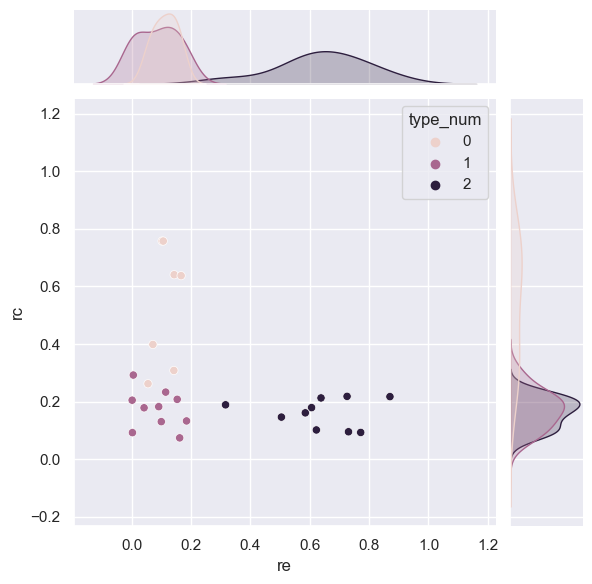

In [253]:
sns.jointplot(x='re', y='rc', data=subsets[4], hue='type_num', kind='scatter')

`Fit` KNN model:

In [250]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

`Plot` the decision boundary of the model:

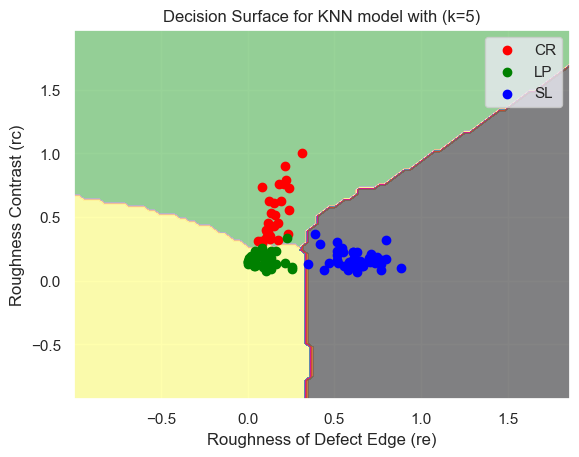

In [262]:
#---min and max for the first feature---
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

#---step size in the mesh---
x_step = (x_max - x_min) / 100
y_step = (y_max - y_min) / 100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
types = ['CR', 'LP', 'SL']
for color, i, target in zip(colors, [0, 1, 2], types):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], color=color, label=target)

plt.xlabel('Roughness of Defect Edge (re)')
plt.ylabel('Roughness Contrast (rc)')
plt.title(f'Decision Surface for KNN model with (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

It seems like there may be some slight overfitting here, but it is not too bad. We will see how it performs.

`Predict` weld defect types using testing data:

In [260]:
y_pred = knn_model.predict(X_test)
print(y_pred)

[2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [261]:
from sklearn.metrics import confusion_matrix

mat_test = confusion_matrix(y_test, y_pred)
print('confusion matrix = \n', mat_test)

confusion matrix = 
 [[7 0 0]
 [1 9 0]
 [0 1 9]]


Text(17.25, 0.5, 'Actual Labels')

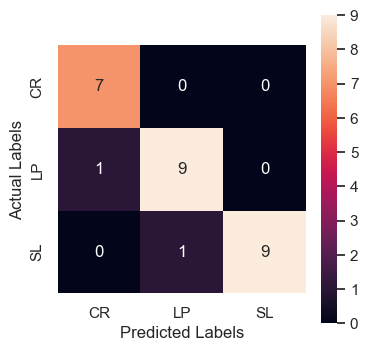

In [268]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True, xticklabels=types, yticklabels=types)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')


`Some precursors to confusion matrix calculations:`

In [297]:
# True Positive (TP) = diagonal elements
CR_TP = mat_test[0,0]
LP_TP = mat_test[1,1]
SL_TP = mat_test[2,2]
print(CR_TP, LP_TP, SL_TP) 

# False Negative (FN) = sum of row - TP
CR_FN = sum(mat_test[0])-CR_TP
LP_FN = sum(mat_test[1])-LP_TP
SL_FN = sum(mat_test[2])-SL_TP
print(CR_FN, LP_FN, SL_FN)

# False Positive (FP) = sum of column - TP
CR_FP = sum(mat_test[:,0])-CR_TP
LP_FP = sum(mat_test[:,1])-LP_TP
SL_FP = sum(mat_test[:,2])-SL_TP
print(CR_FP, LP_FP, SL_FP)


7 9 9
0 1 1
1 1 0


The True Positive Rate (or Recall or Sensitivity) can be calculated using the formula:  

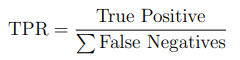


In [284]:
CR_TPR = CR_TP/(CR_TP+CR_FN)
LP_TPR = LP_TP/(LP_TP+LP_FN)
SL_TPR = SL_TP/(SL_TP+SL_FN)
print(CR_TPR, LP_TPR, SL_TPR)

1.0 0.9 0.9


The Positive Predictive Rate (or Precision) can be calculated using the formula:

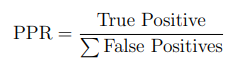

In [285]:
CR_PPR = CR_TP/(CR_TP+CR_FP)
LP_PPR = LP_TP/(LP_TP+LP_FP)
SL_PPR = SL_TP/(SL_TP+SL_FP)
print(CR_PPR, LP_PPR, SL_PPR)

0.875 0.9 1.0


Final Accuracy can be calulated using:

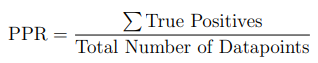

In [307]:
PPR = (CR_TP + LP_TP + SL_TP)/sum(sum(mat_test))
print(PPR)

0.9259259259259259


Let's verify our manual calculations with the `classification_report` function:

In [287]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=types))

              precision    recall  f1-score   support

          CR       0.88      1.00      0.93         7
          LP       0.90      0.90      0.90        10
          SL       1.00      0.90      0.95        10

    accuracy                           0.93        27
   macro avg       0.92      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27



An ~93% accurate model is not bad here. `CR` is 100% accurately predicted, most likely largely due to the large clump of its datapoints near its border with `LP`. Actual `LP` and `SL` points each have 1 as misclassified. The `LP` misclassification has its datapoint over in the `CR` region while `SL` has its datapoint in the `LP` region. This was expected when first visualizing the data in the singular `re` vs `rc` scatterplot earlier. However, the accuracy turned out greater than expected.

### `Finding best K value`

Our model works well but it is always good to check if we can improve it.
We can use a for loop to find the best K value for our model:

In [335]:
from sklearn.metrics import f1_score

for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'k={k}: {f1*100:0.2f}%')
    # print(classification_report(y_test, y_pred, target_names=types))

k=1: 92.59%
k=2: 89.06%
k=3: 89.06%
k=4: 92.62%
k=5: 92.62%
k=6: 92.62%
k=7: 92.69%
k=8: 89.06%
k=9: 92.69%
k=10: 92.69%
k=11: 92.69%
k=12: 92.69%
k=13: 92.69%
k=14: 92.69%
k=15: 92.69%
k=16: 92.69%
k=17: 92.69%
k=18: 92.69%
k=19: 92.69%
k=20: 92.69%


It seems that our original and default k value of 5 was very good for our model. However, there is a slightly higher percentage when going to k=9 and above. That slight increase in accuracy may not be worth the compuational power in some other cases but here it does not affect our research usage so we can change our k to 9 if we were to predict further or perform k-fold cross validation. Higher k values also reduced risk of overfitting.